# Monte Carlo Paths for the CIR Process

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def GeneratePathsCIREuler(NoOfPaths, NoOfSteps, T, lambd, r0, theta, gamma):
    Z = np.random.normal(0, 1, [NoOfPaths, NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps + 1])
    R = np.zeros([NoOfPaths, NoOfSteps + 1])
    
    R[:, 0] = r0
    time = np.zeros([NoOfSteps + 1])
    
    dt = T / float(NoOfSteps)
    
    for i in range(0, NoOfSteps):
        # Making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
            
        W[:, i+1] = W[:, i] + np.power(dt, 0.5) * Z[:, i]
        
        R[:, i+1] = R[:, i] + lambd * (theta - R[:, i]) * dt + gamma * np.sqrt(R[:, i]) * (W[:, i+1] - W[:, i])
        
        # Euler condition
        # Truncated boundary condition
        R[:, i+1] = np.maximum(R[:, i+1], 0)
        
        time[i+1] = time[i] + dt
        
    # Outputs
    paths = {"time": time, "R": R}
    
    return paths

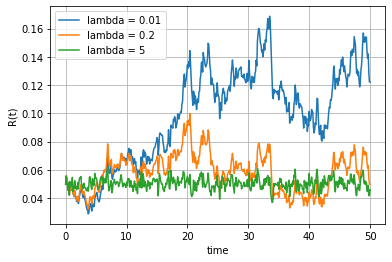

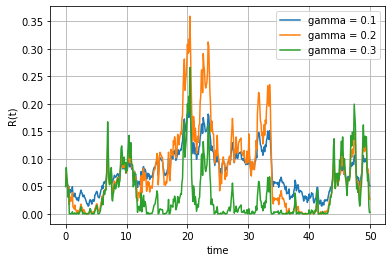

In [5]:
def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 500
    T     = 50
    lambd = 0.1
    gamma = 0.05
    r0    = 0.05
    theta = 0.05
    
    # Effect on mean reversion lambda
    plt.figure(1)
    legend = []
    lambdVec = [0.01, 0.2, 5]
    for lambdTemp in lambdVec:
        np.random.seed(1)
        
        Paths = GeneratePathsCIREuler(NoOfPaths, NoOfSteps, T, lambdTemp, r0, theta, gamma)
        legend.append('lambda = {0}'.format(lambdTemp))
        
        timeGrid = Paths["time"]
        R = Paths["R"]
        plt.plot(timeGrid, np.transpose(R))
        
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("R(t)")
    plt.legend(legend)
    
    # Effect of the volatility
    plt.figure(2)
    legend = []
    gammaVec = [0.1, 0.2, 0.3]
    
    for gammaTemp in gammaVec:
        np.random.seed(1)
        
        Paths = GeneratePathsCIREuler(NoOfPaths, NoOfSteps, T, lambd, r0, theta, gammaTemp)
        legend.append('gamma = {0}'.format(gammaTemp))
        
        timeGrid = Paths["time"]
        R = Paths["R"]
        plt.plot(timeGrid, np.transpose(R))
        
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("R(t)")
    plt.legend(legend)

mainCalculation()